In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
al=pd.read_csv("../Ubuntu_files/Epoch_Hackathon/Dataset.csv")

In [3]:
al1=al.to_numpy()
volac_1=np.array([row[1] for row in al1 if row[11]==1])
volac_0=np.array([row[1] for row in al1 if row[11]==0])
alc_1=np.array([row[10] for row in al1 if row[11]==1])
alc_0=np.array([row[10] for row in al1 if row[11]==0])

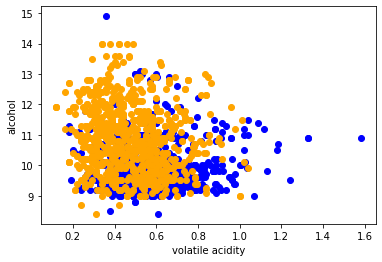

In [4]:
plt.scatter(volac_0,alc_0,color='blue')
plt.scatter(volac_1,alc_1,color='orange')
plt.xlabel("volatile acidity")
plt.ylabel("alcohol")
plt.show()

In [5]:
train_dat=al.loc[:1279,['volatile acidity','alcohol']]
train_lab=al.loc[:1279,'quality']
test_dat=al.loc[1279:,['volatile acidity','alcohol']]
test_lab=al.loc[1279:,'quality']

In [32]:
def prettyPicture(clf, X_test, y_test):
    import pylab as pl
    x_min = 0.0; x_max = 1.0
    y_min = 0.0; y_max = 1.0

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .01  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)

    # Plot also the test points
    grade_sig = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==0]
    bumpy_sig = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==0]
    grade_bkg = [X_test[ii][0] for ii in range(0, len(X_test)) if y_test[ii]==1]
    bumpy_bkg = [X_test[ii][1] for ii in range(0, len(X_test)) if y_test[ii]==1]

    plt.scatter(grade_sig, bumpy_sig, color = "b", label="0 quality")
    plt.scatter(grade_bkg, bumpy_bkg, color = "r", label="1 quality")
    plt.legend()
    plt.xlabel("volatile_acidity")
    plt.ylabel("alcohol")

    plt.savefig("test.png")
def output_image(name, format, bytes):
    import base64
    from base64 import encodebytes
    import json
    import subprocess
    image_start = "BEGIN_IMAGE_f9825uweof8jw9fj4r8"
    image_end = "END_IMAGE_0238jfw08fjsiufhw8frs"
    data = {}
    data['name'] = name
    data['format'] = format
    data['bytes'] = encodebytes(bytes)
    print(image_start+json.dumps(data)+image_end)

In [7]:
train_dat=train_dat.to_numpy()
train_lab=train_lab.to_numpy()
test_dat=test_dat.to_numpy()
test_lab=test_lab.to_numpy()

In [8]:
clf=svm.SVC(kernel='poly')
clf.fit(train_dat,train_lab)

SVC(kernel='poly')

C:\Users\Aaryan\AppData\Local\Temp/ipykernel_8048/2031857402.py:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)


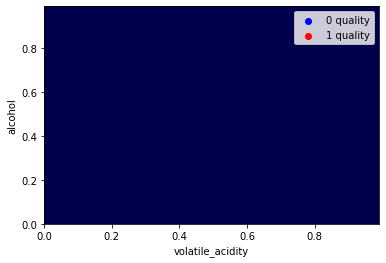

In [20]:
prettyPicture(clf,test_dat,test_lab)

In [33]:
output_image("test.png","png",open("test.png","rb").read())

TypeError: Object of type bytes is not JSON serializable

In [58]:
pred=clf.predict(test_dat)

In [59]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(pred,test_lab)

In [60]:
acc

0.73125

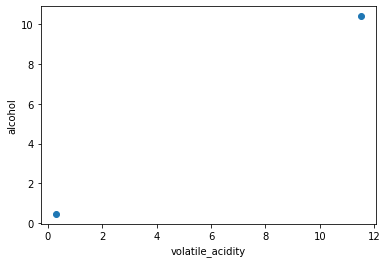

In [79]:
plt.scatter(test_dat[0],test_dat[1])
plt.xlabel("volatile_acidity")
plt.ylabel("alcohol")
plt.show()

In [22]:
import base64

In [27]:
base64.encode?